In [ ]:
import tensorflow as tf
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import seaborn as sns
import cv2

In [ ]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Feature engineering

In [ ]:
Domain_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLDOMAIN_MCLS2.csv')
Domain_data.drop(["Unnamed: 0"], axis=1, inplace=True)
Domain_data.head()

,domain_name,dga_family,domain,length,entropy,first_Digit_Index,H_entropy,vowel_consonant_ratio,vowel_character_ratio,consonant_character_ratio,level_no,alexa_grams,words_grams
0,odqzesdvd.info,nymaim,odqzesdvd,9,2.641604,0,3.324863,0.444444,0.285714,0.642857,2,8.618689,10.200253
1,mcrwnxdzu.info,nymaim,mcrwnxdzu,9,3.169925,0,3.664498,0.300000,0.214286,0.714286,2,5.331953,4.442651
2,poxrscvfoy.biz,nymaim,poxrscvfoy,10,3.121928,0,3.664498,0.300000,0.214286,0.714286,2,9.758886,11.231941
3,dupzwi.info,nymaim,dupzwi,6,2.584963,0,3.277613,0.666667,0.363636,0.545455,2,3.861893,7.928046
4,pgldibr.com,nymaim,pgldibr,7,2.807355,0,3.459432,0.250000,0.181818,0.727273,2,12.146719,20.785039


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create label encoder object
labels = LabelEncoder()

# Convert continous y values to categorical
Domain_data['family_label'] = labels.fit_transform(Domain_data['dga_family'])

In [ ]:
Domain_data.head()

,domain_name,dga_family,domain,length,entropy,first_Digit_Index,H_entropy,vowel_consonant_ratio,vowel_character_ratio,consonant_character_ratio,level_no,alexa_grams,words_grams,family_label
0,odqzesdvd.info,nymaim,odqzesdvd,9,2.641604,0,3.324863,0.444444,0.285714,0.642857,2,8.618689,10.200253,32
1,mcrwnxdzu.info,nymaim,mcrwnxdzu,9,3.169925,0,3.664498,0.300000,0.214286,0.714286,2,5.331953,4.442651,32
2,poxrscvfoy.biz,nymaim,poxrscvfoy,10,3.121928,0,3.664498,0.300000,0.214286,0.714286,2,9.758886,11.231941,32
3,dupzwi.info,nymaim,dupzwi,6,2.584963,0,3.277613,0.666667,0.363636,0.545455,2,3.861893,7.928046,32
4,pgldibr.com,nymaim,pgldibr,7,2.807355,0,3.459432,0.250000,0.181818,0.727273,2,12.146719,20.785039,32


In [ ]:
grouped = Domain_data.groupby('family_label')
Domain = grouped.filter(lambda x: x['family_label'].count() > 5.)

In [ ]:
Domain.head()

,domain_name,dga_family,domain,length,entropy,first_Digit_Index,H_entropy,vowel_consonant_ratio,vowel_character_ratio,consonant_character_ratio,level_no,alexa_grams,words_grams,family_label
0,odqzesdvd.info,nymaim,odqzesdvd,9,2.641604,0,3.324863,0.444444,0.285714,0.642857,2,8.618689,10.200253,32
1,mcrwnxdzu.info,nymaim,mcrwnxdzu,9,3.169925,0,3.664498,0.300000,0.214286,0.714286,2,5.331953,4.442651,32
2,poxrscvfoy.biz,nymaim,poxrscvfoy,10,3.121928,0,3.664498,0.300000,0.214286,0.714286,2,9.758886,11.231941,32
3,dupzwi.info,nymaim,dupzwi,6,2.584963,0,3.277613,0.666667,0.363636,0.545455,2,3.861893,7.928046,32
4,pgldibr.com,nymaim,pgldibr,7,2.807355,0,3.459432,0.250000,0.181818,0.727273,2,12.146719,20.785039,32


In [ ]:
X= Domain.drop(["dga_family", "domain_name", "domain","family_label"], axis=1)
y = Domain["family_label"]

In [ ]:
grouped=y.groupby(y)
grouped.count()

family_label
0         27
1         16
2        104
3     469896
4       1000
7       1000
8        492
9         11
10      1000
11       736
12      1000
13    500540
14       492
15       247
16     29999
17       298
18       299
19     12000
20       100
21       124
22    613032
23      1158
25       908
27      8560
28     10047
29      2708
30      8190
31      5274
32       333
33        40
34       168
35       100
36     44675
37       800
38       199
39      2000
40     19532
41     11160
42    179995
43      2545
44      6015
45     28121
46      2298
47      4256
48       193
49     93707
50        32
51        20
52       510
53       842
54       100
55      9733
Name: family_label, dtype: int64

Class=32, n=333 (0.016%)
Class=19, n=12000 (0.578%)
Class=23, n=1158 (0.056%)
Class=47, n=4256 (0.205%)
Class=8, n=492 (0.024%)
Class=38, n=199 (0.010%)
Class=37, n=800 (0.039%)
Class=2, n=104 (0.005%)
Class=39, n=2000 (0.096%)
Class=30, n=8190 (0.394%)
Class=10, n=1000 (0.048%)
Class=35, n=100 (0.005%)
Class=41, n=11160 (0.537%)
Class=27, n=8560 (0.412%)
Class=46, n=2298 (0.111%)
Class=54, n=100 (0.005%)
Class=51, n=20 (0.001%)
Class=7, n=1000 (0.048%)
Class=55, n=9733 (0.469%)
Class=13, n=500540 (24.103%)
Class=25, n=908 (0.044%)
Class=34, n=168 (0.008%)
Class=50, n=32 (0.002%)
Class=12, n=1000 (0.048%)
Class=28, n=10047 (0.484%)
Class=4, n=1000 (0.048%)
Class=1, n=16 (0.001%)
Class=16, n=29999 (1.445%)
Class=9, n=11 (0.001%)
Class=0, n=27 (0.001%)
Class=52, n=510 (0.025%)
Class=17, n=298 (0.014%)
Class=18, n=299 (0.014%)
Class=3, n=469896 (22.628%)
Class=49, n=93707 (4.512%)
Class=40, n=19532 (0.941%)
Class=45, n=28121 (1.354%)
Class=11, n=736 (0.035%)
Class=48, n=193 (0.009%)
Class

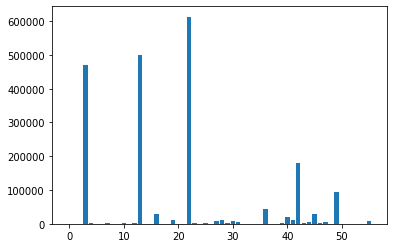

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8,  random_state=42)

Class=13, n=400469 (24.106%)
Class=3, n=375759 (22.618%)
Class=22, n=490589 (29.530%)
Class=36, n=35841 (2.157%)
Class=47, n=3430 (0.206%)
Class=16, n=24017 (1.446%)
Class=49, n=74975 (4.513%)
Class=27, n=6861 (0.413%)
Class=42, n=143993 (8.667%)
Class=19, n=9586 (0.577%)
Class=44, n=4793 (0.289%)
Class=28, n=7980 (0.480%)
Class=55, n=7803 (0.470%)
Class=31, n=4178 (0.251%)
Class=40, n=15574 (0.937%)
Class=41, n=8963 (0.540%)
Class=45, n=22430 (1.350%)
Class=53, n=677 (0.041%)
Class=46, n=1825 (0.110%)
Class=30, n=6547 (0.394%)
Class=29, n=2168 (0.130%)
Class=37, n=650 (0.039%)
Class=15, n=203 (0.012%)
Class=43, n=2061 (0.124%)
Class=8, n=403 (0.024%)
Class=17, n=247 (0.015%)
Class=18, n=236 (0.014%)
Class=35, n=83 (0.005%)
Class=25, n=718 (0.043%)
Class=10, n=786 (0.047%)
Class=4, n=790 (0.048%)
Class=14, n=398 (0.024%)
Class=39, n=1625 (0.098%)
Class=12, n=782 (0.047%)
Class=11, n=585 (0.035%)
Class=32, n=264 (0.016%)
Class=7, n=803 (0.048%)
Class=52, n=401 (0.024%)
Class=34, n=136 (

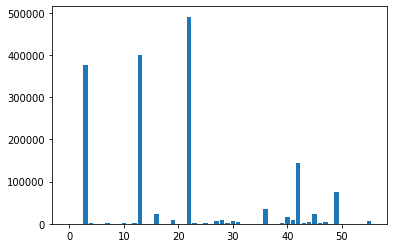

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
grouped=y_train.groupby(y_train)
grouped.count()

family_label
0         17
1         11
2         76
3     375759
4        790
7        803
8        403
9         10
10       786
11       585
12       782
13    400469
14       398
15       203
16     24017
17       247
18       236
19      9586
20        78
21        95
22    490589
23       917
25       718
27      6861
28      7980
29      2168
30      6547
31      4178
32       264
33        29
34       136
35        83
36     35841
37       650
38       164
39      1625
40     15574
41      8963
42    143993
43      2061
44      4793
45     22430
46      1825
47      3430
48       154
49     74975
50        26
51        14
52       401
53       677
54        85
55      7803
Name: family_label, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
strategy = {0:16613,1:16613,2:16613, 4:16613, 7:16613, 8:16613, 9:16613, 10:16613, 11:16613, 12:16613, 14:16613, 15:16613, 18:16613, 17:16613,19:16613, 20:16613,21:16613,23:16613,25:16613,27:16613,28:16613,29:16613,30:16613,31:16613,32:16613,33:16613,34:16613,35:16613,37:16613,38:16613,39:16613,41:16613,43:16613,44:16613,46:16613,47:16613, 48:16613,50:16613,51:16613, 52:16613, 53:16613, 54:16613,55:16613}
#for i in minmum_classes:
ovrsmt = RandomOverSampler(sampling_strategy=strategy)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
udrsmt = RandomUnderSampler(sampling_strategy={42:143527,22:203528,13:193527,3:193529})

In [ ]:
from imblearn.pipeline import Pipeline
steps = [('o', ovrsmt), ('u', udrsmt)]
pipeline = Pipeline(steps=steps)

In [ ]:
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [ ]:
grouped=y_train.groupby(y_train)
grouped.count()

family_label
0      16613
1      16613
2      16613
3     193529
4      16613
7      16613
8      16613
9      16613
10     16613
11     16613
12     16613
13    193527
14     16613
15     16613
16     24017
17     16613
18     16613
19     16613
20     16613
21     16613
22    203528
23     16613
25     16613
27     16613
28     16613
29     16613
30     16613
31     16613
32     16613
33     16613
34     16613
35     16613
36     35841
37     16613
38     16613
39     16613
40     15574
41     16613
42    143527
43     16613
44     16613
45     22430
46     16613
47     16613
48     16613
49     74975
50     16613
51     16613
52     16613
53     16613
54     16613
55     16613
Name: family_label, dtype: int64

Class=0, n=16613 (1.025%)
Class=1, n=16613 (1.025%)
Class=2, n=16613 (1.025%)
Class=3, n=193529 (11.937%)
Class=4, n=16613 (1.025%)
Class=7, n=16613 (1.025%)
Class=8, n=16613 (1.025%)
Class=9, n=16613 (1.025%)
Class=10, n=16613 (1.025%)
Class=11, n=16613 (1.025%)
Class=12, n=16613 (1.025%)
Class=13, n=193527 (11.936%)
Class=14, n=16613 (1.025%)
Class=15, n=16613 (1.025%)
Class=16, n=24017 (1.481%)
Class=17, n=16613 (1.025%)
Class=18, n=16613 (1.025%)
Class=19, n=16613 (1.025%)
Class=20, n=16613 (1.025%)
Class=21, n=16613 (1.025%)
Class=22, n=203528 (12.553%)
Class=23, n=16613 (1.025%)
Class=25, n=16613 (1.025%)
Class=27, n=16613 (1.025%)
Class=28, n=16613 (1.025%)
Class=29, n=16613 (1.025%)
Class=30, n=16613 (1.025%)
Class=31, n=16613 (1.025%)
Class=32, n=16613 (1.025%)
Class=33, n=16613 (1.025%)
Class=34, n=16613 (1.025%)
Class=35, n=16613 (1.025%)
Class=36, n=35841 (2.211%)
Class=37, n=16613 (1.025%)
Class=38, n=16613 (1.025%)
Class=39, n=16613 (1.025%)
Class=40, n=15574 (0.961%)
Cla

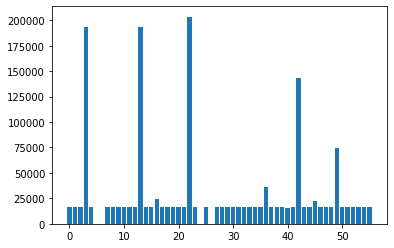

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Ensembling 

In [ ]:
#  ML Algorithms used 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score,classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [ ]:
print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (1621307, 10)
y train size:  (1621307,)
X test size:  (415327, 10)
y test size:  (415327,)


### tuning RF

In [ ]:
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()
rfparam = {'n_estimators': [50,100,150,200],
    'max_depth' : [10, 20, 50,100]                                                                                                                  
           }

In [ ]:
# train across 10 folds, that's a total of (12+6)*5=90 rounds of training 
grid_forest_clf = HalvingGridSearchCV(rfclf, rfparam, scoring='accuracy')
grid_forest_clf.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_forest_clf.best_score_, grid_forest_clf.best_params_))
means = grid_forest_clf.cv_results_['mean_test_score']
stds = grid_forest_clf.cv_results_['std_test_score']
params = grid_forest_clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977290 using {'max_depth': 100, 'n_estimators': 200}
0.778275 (0.002584) with: {'max_depth': 10, 'n_estimators': 50}
0.779174 (0.002809) with: {'max_depth': 10, 'n_estimators': 100}
0.780007 (0.002239) with: {'max_depth': 10, 'n_estimators': 150}
0.780723 (0.002052) with: {'max_depth': 10, 'n_estimators': 200}
0.923316 (0.001156) with: {'max_depth': 20, 'n_estimators': 50}
0.924432 (0.000673) with: {'max_depth': 20, 'n_estimators': 100}
0.925059 (0.000308) with: {'max_depth': 20, 'n_estimators': 150}
0.925004 (0.000568) with: {'max_depth': 20, 'n_estimators': 200}
0.934874 (0.001046) with: {'max_depth': 50, 'n_estimators': 50}
0.935529 (0.000909) with: {'max_depth': 50, 'n_estimators': 100}
0.936023 (0.001219) with: {'max_depth': 50, 'n_estimators': 150}
0.935845 (0.001034) with: {'max_depth': 50, 'n_estimators': 200}
0.934518 (0.000750) with: {'max_depth': 100, 'n_estimators': 50}
0.935495 (0.001002) with: {'max_depth': 100, 'n_estimators': 100}
0.936034 (0.001062) with: {'max

In [ ]:
rfclf = RandomForestClassifier(max_depth = 100, n_estimators= 200).fit(X_train, y_train)

In [ ]:
hhhhyyuu   om sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
RFpred = rfclf.predict(X_test)
print(classification_report(y_test,RFpred))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.67      0.80      0.73         5
           2       0.85      1.00      0.92        28
           3       0.98      0.99      0.99     94137
           4       0.16      0.02      0.03       210
           7       0.93      0.97      0.95       197
           8       0.04      0.03      0.04        89
           9       0.00      0.00      0.00         1
          10       0.29      0.14      0.19       214
          11       0.06      0.03      0.04       151
          12       1.00      1.00      1.00       218
          13       1.00      1.00      1.00    100071
          14       0.92      0.96      0.94        94
          15       0.31      0.20      0.25        44
          16       0.90      0.94      0.92      5982
          17       0.00      0.00      0.00        51
          18       0.07      0.05      0.06        63
          19       0.99    

In [ ]:
print('accuracy on the train set: ', accuracy_score(rfclf.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, RFpred))

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

pprd = rfclf.predict_proba(X_test)

In [ ]:
auc = metrics.roc_auc_score(y_test, pprd, multi_class='ovo', average='weighted')
print(auc)

0.9543725379511858


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_RFmodel_m_TN.sav'
pickle.dump(rfclf, open(filename, 'wb'))

### tuning BDT

In [ ]:
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv 

# now import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
param_grid = {
    'base_estimator__max_depth' : [10, 30, 50],
    'max_samples' : [0.05, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [10, 30, 50],
                         'max_samples': [0.05, 0.2, 0.5]})

In [ ]:
# summarize results
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.971591 using {'base_estimator__max_depth': 50, 'max_samples': 0.5}
0.770534 (0.002180) with: {'base_estimator__max_depth': 10, 'max_samples': 0.05}
0.773037 (0.002040) with: {'base_estimator__max_depth': 10, 'max_samples': 0.2}
0.773005 (0.001110) with: {'base_estimator__max_depth': 10, 'max_samples': 0.5}
0.936437 (0.001218) with: {'base_estimator__max_depth': 30, 'max_samples': 0.05}
0.962557 (0.001441) with: {'base_estimator__max_depth': 30, 'max_samples': 0.2}
0.971049 (0.001879) with: {'base_estimator__max_depth': 30, 'max_samples': 0.5}
0.936082 (0.002337) with: {'base_estimator__max_depth': 50, 'max_samples': 0.05}
0.963074 (0.001324) with: {'base_estimator__max_depth': 50, 'max_samples': 0.2}
0.971591 (0.001708) with: {'base_estimator__max_depth': 50, 'max_samples': 0.5}


In [ ]:
from sklearn.metrics import classification_report
bdtpred = clf.predict(X_test)
print(classification_report(y_test,bdtpred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.71      1.00      0.83         5
           2       0.75      0.96      0.84        28
           3       0.97      0.98      0.98     94137
           4       0.43      0.01      0.03       210
           7       0.92      0.97      0.94       197
           8       0.09      0.07      0.08        89
           9       0.00      0.00      0.00         1
          10       0.24      0.12      0.16       214
          11       0.05      0.02      0.03       151
          12       0.99      1.00      0.99       218
          13       1.00      1.00      1.00    100071
          14       0.88      0.98      0.93        94
          15       0.23      0.25      0.24        44
          16       0.91      0.92      0.92      5982
          17       0.07      0.10      0.08        51
          18       0.10      0.14      0.12        63
          19       0.99    

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

pprd = clf.predict_proba(X_test)

In [ ]:
auc = metrics.roc_auc_score(y_test, pprd, multi_class='ovo', average='weighted')
print(auc)

0.9859281413112434


### tuning VT

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# define the base models
estimators = []
model1 = LogisticRegression()
estimators.append(('lr', model1))
model2 = DecisionTreeClassifier()
estimators.append(('dt', model2))
model4 = GaussianNB()
estimators.append(('nb', model4))


# create the ensemble model
VTensemble = VotingClassifier(estimators,voting='soft')

params = {'dt__criterion': ['gini','entropy'],
          'dt__max_depth':[10,20],
      'lr__C':[0.01,0.1,0.5,1],
      }

grid=HalvingGridSearchCV(VTensemble, params).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.873703 using {'dt__criterion': 'entropy', 'dt__max_depth': 20, 'lr__C': 1}
0.726982 (0.002106) with: {'dt__criterion': 'gini', 'dt__max_depth': 10, 'lr__C': 0.01}
0.727054 (0.002601) with: {'dt__criterion': 'gini', 'dt__max_depth': 10, 'lr__C': 0.1}
0.726177 (0.003287) with: {'dt__criterion': 'gini', 'dt__max_depth': 10, 'lr__C': 0.5}
0.726277 (0.002796) with: {'dt__criterion': 'gini', 'dt__max_depth': 10, 'lr__C': 1}
0.812004 (0.003553) with: {'dt__criterion': 'gini', 'dt__max_depth': 20, 'lr__C': 0.01}
0.809972 (0.003382) with: {'dt__criterion': 'gini', 'dt__max_depth': 20, 'lr__C': 0.1}
0.808568 (0.002266) with: {'dt__criterion': 'gini', 'dt__max_depth': 20, 'lr__C': 0.5}
0.809117 (0.002936) with: {'dt__criterion': 'gini', 'dt__max_depth': 20, 'lr__C': 1}
0.731090 (0.002484) with: {'dt__criterion': 'entropy', 'dt__max_depth': 10, 'lr__C': 0.01}
0.730246 (0.002906) with: {'dt__criterion': 'entropy', 'dt__max_depth': 10, 'lr__C': 0.1}
0.729264 (0.002299) with: {'dt__criterion'

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
ensemblepred = grid.predict(X_test)
print(classification_report(y_test,ensemblepred))

              precision    recall  f1-score   support

           0       0.05      0.80      0.10        10
           1       0.19      0.60      0.29         5
           2       0.79      0.79      0.79        28
           3       0.95      0.96      0.96     94137
           4       0.02      0.06      0.03       210
           7       0.93      0.95      0.94       197
           8       0.02      0.09      0.03        89
           9       0.00      0.00      0.00         1
          10       0.12      0.21      0.15       214
          11       0.03      0.07      0.04       151
          12       0.99      1.00      0.99       218
          13       0.98      1.00      0.99    100071
          14       0.69      0.98      0.81        94
          15       0.06      0.34      0.10        44
          16       0.84      0.97      0.90      5982
          17       0.03      0.88      0.05        51
          18       0.07      0.71      0.12        63
          19       0.99    

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

pprd = grid.predict_proba(X_test)

In [ ]:
#roc auc score
auc = metrics.roc_auc_score(y_test, pprd, multi_class='ovo', average='weighted')
print(auc)

0.9755783236696552


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MVTmodel_tn_sm.sav'
pickle.dump(VTensemble, open(filename, 'wb'))

### tuning xgb

In [ ]:
from xgboost import XGBClassifier
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV

xgb_classifier = XGBClassifier()
xgbparams = {'max_depth': [5,10,20,50]}

xgbgrid = HalvingGridSearchCV(xgb_classifier, xgbparams, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (xgbgrid.best_score_, clf.best_params_))
means = xgbgrid.cv_results_['mean_test_score']
stds = xgbgrid.cv_results_['std_test_score']
params = xgbgrid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
XGBpred = xgbgrid.predict(X_test)
print(classification_report(y_test,XGBpred))

### tuning AB

In [ ]:
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier())
abparam = {'n_estimators': [50,100]                                                                                                               
           }

In [ ]:
abclf = HalvingGridSearchCV(clf, abparam, scoring='accuracy').fit(X_train, y_train)

In [ ]:

# summarize results
print("Best: %f using %s" % (abclf.best_score_, abclf.best_params_))
means = abclf.cv_results_['mean_test_score']
stds = abclf.cv_results_['std_test_score']
params = abclf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.978272 using {'n_estimators': 100}
0.977396 (0.001989) with: {'n_estimators': 50}
0.978272 (0.001945) with: {'n_estimators': 100}


In [ ]:
 from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
 y_true, y_pred = y_test, abclf.predict(X_test)
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       1.00      1.00      1.00         5
           2       0.76      1.00      0.86        28
           3       0.98      0.99      0.99     94137
           4       0.14      0.00      0.01       210
           7       0.93      0.98      0.96       197
           8       0.04      0.02      0.03        89
           9       0.00      0.00      0.00         1
          10       0.35      0.10      0.16       214
          11       0.07      0.02      0.03       151
          12       1.00      1.00      1.00       218
          13       1.00      1.00      1.00    100071
          14       0.90      0.95      0.92        94
          15       0.43      0.14      0.21        44
          16       0.90      0.96      0.92      5982
          17       0.00      0.00      0.00        51
          18       0.09      0.03      0.05        63
          19       1.00    

In [ ]:
print('accuracy on the train set: ', accuracy_score(abclf.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, y_pred))

accuracy on the train set:  0.9995497459765486
accuracy on the test set:  0.9603998776867384


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

pprd = abclf.predict_proba(X_test)

In [ ]:
auc = metrics.roc_auc_score(y_test, pprd, multi_class='ovo', average='weighted')
print(auc)

0.9756874916485627


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_ABmodel_m_TN.sav'
pickle.dump(abclf, open(filename, 'wb'))